# Video Game Sales - Genre Popularity

Data from: https://data.world/julienf/video-games-global-sales-in-volume-1983-2017

Numbers in Millions of Copies sold to date  
11859 total games listed

- Since Sales tied to release year, we will assume all sales were conducted on year of release.
- Popularity is measured by **Percentage of all games sold in the same year**

In [1]:
import pandas as pd
import seaborn as sns
% pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
df = pd.read_csv('vgsalesGlobale.csv', index_col=0)

In [3]:
df.head(5)

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
Rank,,,,,,,,,,
1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


## Data Cleaning
Aggregate platforms to see sales figures independent of platform

In [4]:
noPlatforms = df.groupby(['Name', 'Publisher'],as_index=False).agg({'Genre' : 'min','Year' : 'min',
                      'NA_Sales' : 'sum', 
                      'EU_Sales' : 'sum', 
                      'JP_Sales' : 'sum', 
                   'Other_Sales' : 'sum', 
                  'Global_Sales' : 'sum'})

In [5]:
noPlatforms.head()

,Name,Publisher,EU_Sales,Global_Sales,NA_Sales,Other_Sales,Year,Genre,JP_Sales
0,'98 Koshien,Magical Company,0.10,0.41,0.15,0.03,1998.0,Sports,0.12
1,.hack//G.U. Vol.1//Rebirth,Namco Bandai Games,0.00,0.17,0.00,0.00,2006.0,Role-Playing,0.17
2,.hack//G.U. Vol.2//Reminisce,Namco Bandai Games,0.09,0.23,0.11,0.03,2006.0,Role-Playing,0.00
3,.hack//G.U. Vol.2//Reminisce (jp sales),Namco Bandai Games,0.00,0.16,0.00,0.00,2006.0,Role-Playing,0.16
4,.hack//G.U. Vol.3//Redemption,Namco Bandai Games,0.00,0.17,0.00,0.00,2007.0,Role-Playing,0.17


One game incorrectly states a release year of 2020.

In [6]:
noPlatforms[noPlatforms['Year'] == 2020]

,Name,Publisher,EU_Sales,Global_Sales,NA_Sales,Other_Sales,Year,Genre,JP_Sales
4439,Imagine: Makeup Artist,Ubisoft,0.0,0.29,0.27,0.02,2020.0,Simulation,0.0


Change it to a 2009 release year, as stated online.

In [7]:
noPlatforms.loc[noPlatforms['Year'] == 2020,'Year'] = 2009
noPlatforms[noPlatforms['Name'] == 'Imagine: Makeup Artist']

,Name,Publisher,EU_Sales,Global_Sales,NA_Sales,Other_Sales,Year,Genre,JP_Sales
4439,Imagine: Makeup Artist,Ubisoft,0.0,0.29,0.27,0.02,2009.0,Simulation,0.0


# North America Genre popularity Over Time

In [8]:
# Filter columns
GenresNA = noPlatforms[['NA_Sales', 'Year', 'Genre']]

# Sum sales numbers by year and genre
GenresNA = GenresNA.groupby(['Year','Genre'],as_index=False).sum()
# For sake of minimizing clutter, remove 'misc' Genre
GenresNA = GenresNA[GenresNA['Genre'] != 'Misc']

Calculate Percents (Of all games sold that year in NA, this percent was for this genre)

In [9]:
# New column for sales sums per year
GenresNA['YrSales'] = 0.00

# Total game sales of that year
for i in range(1980, 2017):
    GenresNA.loc[GenresNA['Year'] == i, 'YrSales'] = GenresNA[GenresNA['Year'] == i]['NA_Sales'].sum()

# Use new column to calculate sales percent
GenresNA['SalesPercent'] = GenresNA['NA_Sales'] / GenresNA['YrSales']

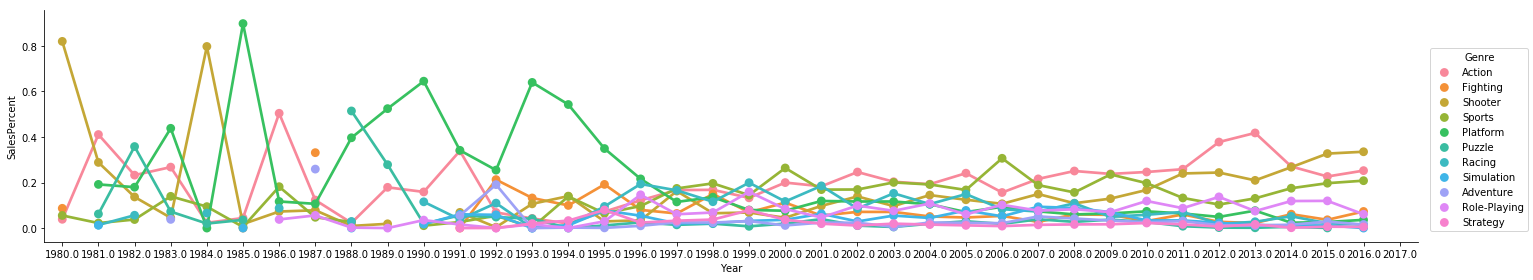

In [10]:
sns.factorplot(x='Year', y='SalesPercent',hue='Genre', data=GenresNA,aspect=5)

# Europe Genre Popularity over time

In [11]:
# Filter columns
GenresEU = noPlatforms[['EU_Sales', 'Year', 'Genre']]

# Sum sales numbers by year and genre
GenresEU = GenresEU.groupby(['Year','Genre'],as_index=False).sum()
# For sake of minimizing clutter, remove 'misc' Genre
GenresEU = GenresEU[GenresEU['Genre'] != 'Misc']

# New column for sales sums per year
GenresEU['YrSales'] = 0.00

for i in range(1980, 2017):
    GenresEU.loc[GenresEU['Year'] == i, 'YrSales'] = GenresEU[GenresEU['Year'] == i]['EU_Sales'].sum()

# Use new column to calculate sales percent
GenresEU['SalesPercent'] = GenresEU['EU_Sales'] / GenresEU['YrSales']

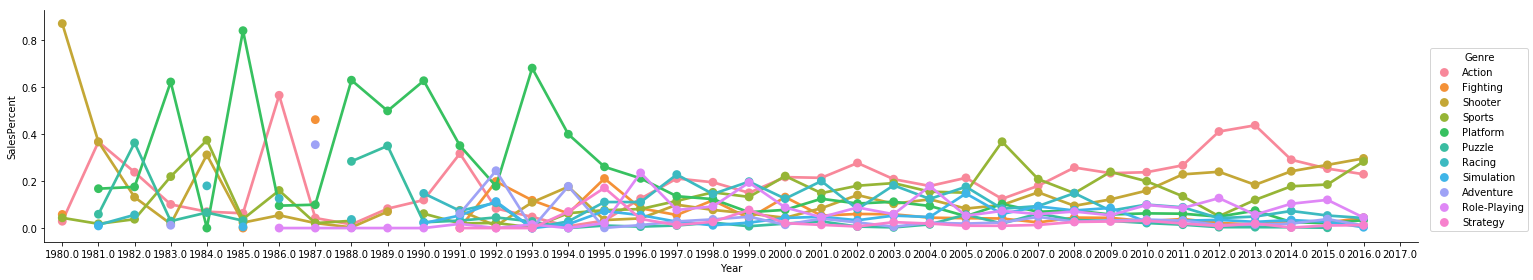

In [12]:
sns.factorplot(x='Year', y='SalesPercent',hue='Genre', data=GenresEU,aspect=5)

# Japan Genre Popularity over time

In [13]:
# Filter columns
GenresJP = noPlatforms[['JP_Sales', 'Year', 'Genre']]

# Sum sales numbers by year and genre
GenresJP = GenresJP.groupby(['Year','Genre'],as_index=False).sum()
# For sake of minimizing clutter, remove 'misc' Genre
GenresJP = GenresJP[GenresJP['Genre'] != 'Misc']

# New column for sales sums per year
GenresJP['YrSales'] = 0.00

for i in range(1980, 2017):
    GenresJP.loc[GenresJP['Year'] == i, 'YrSales'] = GenresJP[GenresJP['Year'] == i]['JP_Sales'].sum()

# Use new column to calculate sales percent
GenresJP['SalesPercent'] = GenresJP['JP_Sales'] / GenresJP['YrSales']

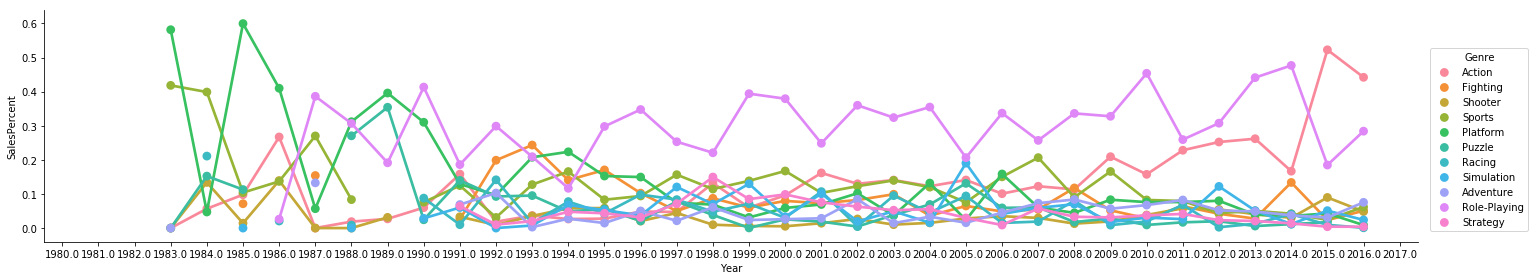

In [14]:
sns.factorplot(x='Year', y='SalesPercent',hue='Genre', data=GenresJP,aspect=5)

## Percents Exports (for Tableau)

In [17]:
GenresNA.to_csv('GenresNA_Percent.csv')
GenresEU.to_csv('GenresEU_Percent.csv')
GenresJP.to_csv('GenresJP_Percent.csv')

# Cumulative Sales over Time

# Conclusions

- Platformers dominated in the 1980s (Super Mario) Because few other genres existed yet.  With more genres entering the market, Platformer popularity declined.
- Action, Shooter and Sports games dominate the North American and European game markets, while Role-Playing and Action games dominate the Japanese market.